In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# Model

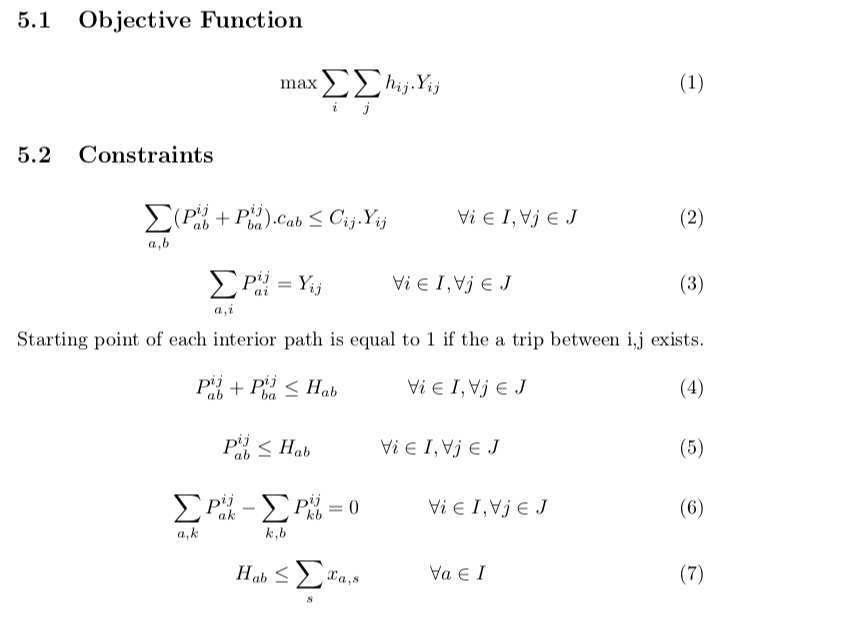

In [5]:
Image('Model_V01_Dec12.png')

# Sets

In [39]:
# Set  of Origions
I = [i for i in range(0,5)] 

# Set of Destinations
J = [j for j in range(0,5)]

# Set of Scooters
S = [s for s in range(0,10)]

IJ = [(i,j) for i in I for j in J]

IS = [(i,s) for i in I for s in S]

AB = [(a,b) for a in I for b in J]

AI = [(a,i) for a in I for i in I]

IJAB = [(i,j,a,b) for i in I for j in J for a in I for b in J]


# Parameters

In [36]:
demand = pd.read_excel('data.xlsx',sheet_name='demand') 
h = {(i,j): demand[j][i] for (i,j) in IJ}

cost = pd.read_excel('data.xlsx',sheet_name='cost') 
c = {(a,b): cost[b][a] for (a,b) in AB}

# Decision Variables

In [23]:
# we define it when we are modeling the problem with the Gurobi.

# Modeling w/Gurobi

In [24]:
from gurobipy import Model, GRB, quicksum

In [25]:
mdl = Model('Interior_Network_Design')

Restricted license - for non-production use only - expires 2023-10-25


In [34]:
## Decision Variables

# if scooter s is in location i
x = mdl.addVars(IS, vtype = GRB.BINARY)

# if arc (a,b) is used to an trip
H = mdl.addVars(AB, vtype = GRB.BINARY)

# if there is a trip from i to j
y = mdl.addVars(IJ, vtype = GRB.BINARY)

# if a paved trip between i and j uses arc (a,b) in the direction of a to b
p = mdl.addVars(IJAB, vtype = GRB.BINARY)

# Objective Function

In [35]:
mdl.setObjective(quicksum(h[i,j]*y[i,j] for i,j in IJ)
                ,GRB.MAXIMIZE)

# S.t.

In [43]:
mdl.addConstrs(quicksum((p[i,j,a,b] + p[i,j,b,a])*c[a,b] for a,b in AB) 
               <= 20*y[i,j] for i,j in IJ)


mdl.addConstrs(quicksum(p[i,j,a,i] for a,i in AI) 
               == y[i,j] for i,j in IJ)

mdl.addConstrs(p[i,j,a,b] + p[i,j,b,a]
               <= H[a,b] for i,j,a,b in IJAB)

mdl.addConstrs(p[i,j,a,b]
               <= H[a,b] for i,j,a,b in IJAB)

{(0, 0, 0, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 1, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 2, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 2, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 3, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 3, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 3, 2): <gurobi.Constr *Awaiting Model Up